# Mutiple Linear Regression

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

In [98]:
cars = pd.read_csv(r"C:\\Users\\kumar\\Downloads\\CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [99]:
cars.shape

(205, 26)

In [100]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [101]:
cars['company'] = cars['CarName'].apply(lambda x: x.split()[0])

In [102]:
cars = cars.drop(["CarName"],axis = 1)

In [103]:
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


# Convert Categorical features into numerical

In [104]:
fueltype_mapping = {'gas': 0, 'diesel': 1}
aspiration_mapping = {'std': 0, 'turbo': 1}
doornumber_mapping = {'four': 4, 'two': 2}
enginelocation_mapping = {'front': 0, 'rear': 1} # Assuming rear = 1
drivewheel_mapping = {'fwd':1,'rwd':0.5,'4wd':0}
carbody_mapping = {'sedan':1,'hatchback':0.75,'wagon':0.50,'hardtop':0.25,'convertible':0}

# Apply the mappings to the columns
cars['fueltype'] = cars['fueltype'].replace(fueltype_mapping)
cars['aspiration'] = cars['aspiration'].replace(aspiration_mapping)
cars['doornumber'] = cars['doornumber'].replace(doornumber_mapping)
cars['enginelocation'] = cars['enginelocation'].replace(enginelocation_mapping)
cars["drivewheel"] = cars["drivewheel"].replace(drivewheel_mapping)
cars["carbody"] = cars["carbody"].replace(carbody_mapping)

In [105]:
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,0,0,2,0.00,0.5,0,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,0,0,2,0.00,0.5,0,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,0,0,2,0.75,0.5,0,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,0,0,4,1.00,1.0,0,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,0,0,4,1.00,0.0,0,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [106]:
cars = cars.drop(["fuelsystem"],axis = 1)

In [107]:
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,0,0,2,0.00,0.5,0,88.6,168.8,...,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,0,0,2,0.00,0.5,0,88.6,168.8,...,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,0,0,2,0.75,0.5,0,94.5,171.2,...,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,0,0,4,1.00,1.0,0,99.8,176.6,...,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,0,0,4,1.00,0.0,0,99.4,176.6,...,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


<Axes: xlabel='company'>

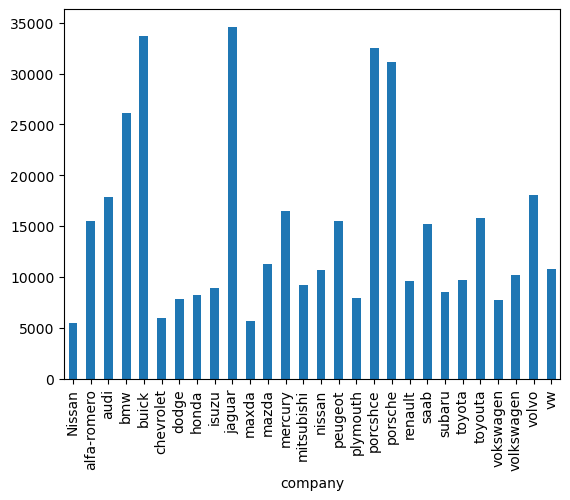

In [108]:
cars.groupby("company")["price"].mean().plot.bar()

In [109]:
import scipy.stats as stats

# Perform ANOVA
f_val, p_val = stats.f_oneway(
    *[cars[cars['company'] == company]['price'] for company in cars['company'].unique()]
)

print(f"ANOVA F-value: {f_val}, p-value: {p_val}")


ANOVA F-value: 28.24563859199753, p-value: 1.655368889172302e-50


# We are doing Label encoding for each comapny name:

In [110]:
## assuming Object for LabelEncoder le

le = LabelEncoder()
cars["company"] = le.fit_transform(cars["company"])

In [111]:
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,0,0,2,0.00,0.5,0,88.6,168.8,...,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,0,0,2,0.00,0.5,0,88.6,168.8,...,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,0,0,2,0.75,0.5,0,94.5,171.2,...,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,0,0,4,1.00,1.0,0,99.8,176.6,...,109,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,5,2,0,0,4,1.00,0.0,0,99.4,176.6,...,136,3.19,3.40,8.0,115,5500,18,22,17450.0,2


In [112]:
cars = cars.drop(["enginetype"],axis = 1)
cars["cylindernumber"] = cars["cylindernumber"].replace({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12})


In [113]:
cars.shape

(205, 24)

# Split the data into X and y
- train_test_split

In [114]:
X = cars.drop(['price','car_ID'],axis = 1)
y = cars['price']

In [115]:
X.shape

(205, 22)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=100)

In [117]:
X_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,company
171,2,0,0,2,0.75,0.5,0,98.4,176.2,65.6,...,4,146,3.62,3.50,9.3,116,4800,24,30,22
68,-1,1,1,4,0.50,0.5,0,110.0,190.9,70.3,...,5,183,3.58,3.64,21.5,123,4350,22,25,4
193,0,0,0,4,0.50,1.0,0,100.4,183.1,66.9,...,4,109,3.19,3.40,9.0,88,5500,25,31,25
152,1,0,0,4,0.75,1.0,0,95.7,158.7,63.6,...,4,92,3.05,3.03,9.0,62,4800,31,38,22
30,2,0,0,2,0.75,1.0,0,86.6,144.6,63.9,...,4,92,2.91,3.41,9.6,58,4800,49,54,7


In [118]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 171 to 8
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         61 non-null     int64  
 1   fueltype          61 non-null     int64  
 2   aspiration        61 non-null     int64  
 3   doornumber        61 non-null     int64  
 4   carbody           61 non-null     float64
 5   drivewheel        61 non-null     float64
 6   enginelocation    61 non-null     int64  
 7   wheelbase         61 non-null     float64
 8   carlength         61 non-null     float64
 9   carwidth          61 non-null     float64
 10  carheight         61 non-null     float64
 11  curbweight        61 non-null     int64  
 12  cylindernumber    61 non-null     int64  
 13  enginesize        61 non-null     int64  
 14  boreratio         61 non-null     float64
 15  stroke            61 non-null     float64
 16  compressionratio  61 non-null     float64
 17  hor

# Building Our First Model

In [119]:
X_train_sm = sm.add_constant(X_train)

In [120]:
lr = sm.OLS(y_train,X_train_sm)

# Fitting the model

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     21.61
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           2.26e-15
Time:                        21:42:16   Log-Likelihood:                -558.57
No. Observations:                  61   AIC:                             1161.
Df Residuals:                      39   BIC:                             1208.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8.439e+04   3.34e+04     -2.525      0.016   -1.52e+05   -1.68e+04
symboling         1536.0983    617.538      2.487      0.017     287.010    2785.186
fueltype         -1.352e+04   1.55e+04     -0.873      0.388   -4.49e+04    1.78e+04
aspiration         -67.2964   2207.203     -0.030      0.976   -4531.785    4397.192
doornumber        1447.2500    666.135      2.173      0.036      99.864    2794.636
carbody          -2849.1541   2367.383     -1.204      0.236   -7637.638    1939.330
drivewheel       -1421.0665   2606.911     -0.545      0.589   -6694.041    3851.908
enginelocation     -1.1e-09   4.42e-10     -2.487      0.017   -1.99e-09   -2.05e-10
wheelbase          333.7669    188.206      1.773      0.084     -46.917     714.450
carlength         -177.0046    119.781     -1.478      0.148    -419.284      65.275
carwidth          1150.2981    577.272      1.993      0.053     -17.345    2317.941
carheight          418.6740    291.095      1.438      0.158    -170.121    1007.469
curbweight          -2.2322      3.980     -0.561      0.578     -10.283       5.818
cylindernumber   -1297.8733   1506.323     -0.862      0.394   -4344.699    1748.953
enginesize         124.1330     71.746      1.730      0.092     -20.987     269.253
boreratio        -4585.9449   4091.265     -1.121      0.269   -1.29e+04    3689.420
stroke           -1875.6938   2324.556     -0.807      0.425   -6577.553    2826.165
compressionratio  1235.5773   1064.591      1.161      0.253    -917.761    3388.915
horsepower          66.7865     39.219      1.703      0.097     -12.541     146.113
peakrpm             -0.0692      1.488     -0.046      0.963      -3.078       2.940
citympg            100.0800    470.707      0.213      0.833    -852.014    1052.174
highwaympg        -205.9043    429.413     -0.480      0.634   -1074.474     662.666
company           -157.3674     73.222     -2.149      0.038    -305.474      -9.261
==============================================================================
Omnibus:                        0.285   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.091
Skew:                          -0.094   Prob(JB):                        0.955
Kurtosis:                       3.016   Cond. No.                     7.81e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.32e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [121]:
X = X_train.drop(["symboling","fueltype","aspiration","doornumber","carbody",
                  "wheelbase","carlength","carheight","curbweight","peakrpm","citympg","highwaympg"],axis = 1)


## Droping These Columns Because these columns are not significant for prediction they have very high p-values

In [122]:
X_train_sm = sm.add_constant(X)

lr = sm.OLS(y_train,X_train_sm)

# Fitting the model

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     49.70
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           3.84e-22
Time:                        21:42:17   Log-Likelihood:                -566.42
No. Observations:                  61   AIC:                             1153.
Df Residuals:                      51   BIC:                             1174.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.987e+04   2.04e+04     -2.928      0.005   -1.01e+05   -1.88e+04
drivewheel       -2585.0642   1467.966     -1.761      0.084   -5532.128     362.000
enginelocation    1.828e-09   6.16e-10      2.968      0.005    5.92e-10    3.06e-09
carwidth          1372.7964    287.830      4.769      0.000     794.954    1950.639
cylindernumber   -1326.3696   1009.682     -1.314      0.195   -3353.390     700.651
enginesize         104.3117     36.220      2.880      0.006      31.596     177.027
boreratio        -4764.1102   3098.197     -1.538      0.130    -1.1e+04    1455.780
stroke           -3232.6523   1809.461     -1.787      0.080   -6865.297     399.993
compressionratio   157.1086    104.117      1.509      0.137     -51.915     366.132
horsepower          42.6715     17.065      2.500      0.016       8.411      76.932
company           -181.5058     62.444     -2.907      0.005    -306.867     -56.145
==============================================================================
Omnibus:                        0.657   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.748
Skew:                           0.224   Prob(JB):                        0.688
Kurtosis:                       2.694   Cond. No.                     1.51e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.97e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Checking VIF for Multicolinearity

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X,i)for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)

vif

,features,VIF
2,carwidth,1186.39
5,boreratio,642.14
6,stroke,192.19
3,cylindernumber,117.37
4,enginesize,115.82
8,horsepower,24.06
0,drivewheel,10.79
7,compressionratio,9.12
9,company,6.80
1,enginelocation,NaN


In [125]:
X = X.drop(["carwidth","boreratio","stroke"],axis = 1)

In [126]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)

# Fitting the model

lr_model = lr.fit()

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     49.74
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           2.98e-20
Time:                        21:42:18   Log-Likelihood:                -578.73
No. Observations:                  61   AIC:                             1171.
Df Residuals:                      54   BIC:                             1186.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               61.1773   2806.251      0.022      0.983   -5565.018    5687.373
drivewheel       -3986.1356   1662.965     -2.397      0.020   -7320.180    -652.091
enginelocation   -1.141e-11   5.02e-12     -2.271      0.027   -2.15e-11   -1.34e-12
cylindernumber    -790.4067    694.642     -1.138      0.260   -2183.081     602.267
enginesize         102.5366     25.352      4.044      0.000      51.709     153.365
compressionratio   241.4425    113.832      2.121      0.039      13.223     469.662
horsepower          67.2417     17.728      3.793      0.000      31.700     102.784
company           -180.7123     64.487     -2.802      0.007    -310.000     -51.424
==============================================================================
Omnibus:                        3.775   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                2.998
Skew:                           0.527   Prob(JB):                        0.223
Kurtosis:                       3.260   Cond. No.                     4.87e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.57e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [127]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X,i)for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)

vif

,features,VIF
3,enginesize,66.45
2,cylindernumber,58.19
5,horsepower,22.31
4,compressionratio,6.91
0,drivewheel,5.49
6,company,4.59
1,enginelocation,NaN


In [128]:
X = X.drop(["enginesize","cylindernumber"],axis = 1)

In [129]:
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)

# Fitting the model

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     50.05
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           7.37e-18
Time:                        21:42:19   Log-Likelihood:                -589.56
No. Observations:                  61   AIC:                             1189.
Df Residuals:                      56   BIC:                             1200.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2601.8581   3141.568      0.828      0.411   -3691.459    8895.175
drivewheel       -5333.9970   1916.914     -2.783      0.007   -9174.037   -1493.957
enginelocation   -6.215e-12   2.25e-12     -2.766      0.008   -1.07e-11   -1.71e-12
compressionratio   448.5849    123.475      3.633      0.001     201.234     695.936
horsepower         129.8013     12.366     10.497      0.000     105.029     154.573
company           -225.4122     74.828     -3.012      0.004    -375.311     -75.513
==============================================================================
Omnibus:                       10.029   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.786
Skew:                           0.844   Prob(JB):                      0.00750
Kurtosis:                       4.000   Cond. No.                     6.35e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [130]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X,i)for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)

vif

,features,VIF
0,drivewheel,4.95
2,compressionratio,4.90
4,company,4.54
3,horsepower,3.92
1,enginelocation,NaN


# Step 4: Residual Analysis

In [131]:
y_train_pred = lr_model.predict(X_train_sm)

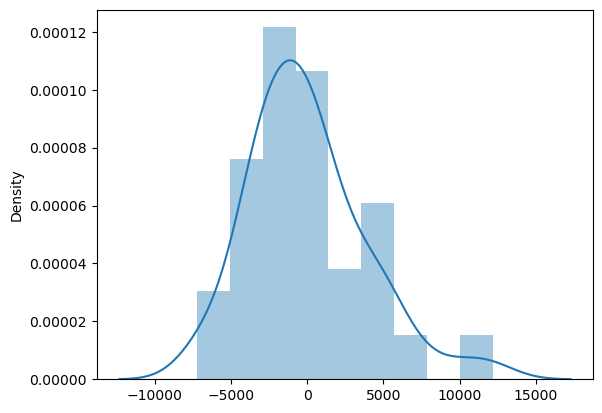

In [132]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show() # this is the distribution of error Terms

- - -  As we can see our residuals are normally distributed it means model is working Good

# Step 5: Model Evaluation and Prediction on Test set

### Making Prediction on test set
### Evaluate the model using r_squared

### Add a constant and intercept to the test set

In [133]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(61, 22)
(144, 22)
(61,)
(144,)


## Preprocessing Scaled The Data on same scale

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [138]:
print(lr_model.params)

const               2.601858e+03
drivewheel         -5.333997e+03
enginelocation     -6.214704e-12
compressionratio    4.485849e+02
horsepower          1.298013e+02
company            -2.254122e+02
dtype: float64


In [139]:
X_test.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'company'],
      dtype='object')

# We drop these features from test_data Because my my model train on 
### ["drivewheel","enginelocation","compressionratio","horsepower","company"]

In [140]:
X_test = X_test.drop(["symboling","fueltype","aspiration","doornumber","carbody","wheelbase",
                     "carlength","carwidth","carheight","curbweight","cylindernumber","enginesize",
                     "boreratio","stroke","peakrpm","citympg","highwaympg"],axis = 1)

In [141]:
X_test_sm = sm.add_constant(X_test)

In [142]:
y_test_pred = lr_model.predict(X_test_sm)

In [143]:
from sklearn.metrics import r2_score

In [144]:
r2 = r2_score(y_test,y_test_pred)
r2

0.7270063709282857

## At the last my training r-square is 77% that's mean 77% price of cars depends on the features on which the model is trained and r2 score on test set is 72% It means Our model working good on Both train and test data